In [1]:
### Imports and metadata ###

import os
import sys
import time
import glob
import numpy as np
import tensorflow as tf 
from keras import backend as K
from keras.layers import *
from keras.models import Model, load_model
from keras.optimizers import *
import visualize
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from functools import reduce

Using TensorFlow backend.


In [2]:
### Load data ###

data_path = 'data'
files = glob.glob(os.path.join(data_path, '*.csv'))
datasets = [np.genfromtxt(file, delimiter=',') for file in files]
labels = np.concatenate([[i]*len(ds) for i,ds in enumerate(datasets)], axis=0)
data = np.concatenate(datasets, axis=0)

# center all wrist positions to 0,0
data = data - np.expand_dims(data[:,0],axis=-1)

# normalize
data /= np.max(data)

# add cluster labels 
data_labeled = np.concatenate((data, np.expand_dims(labels, axis=1)), axis=-1)

In [3]:
### Load models ###

basic_enc = load_model('models/basic_enc.h5')
basic_dec = load_model('models/basic_dec.h5')

tsne_enc = load_model('models/tsne_enc.h5')
tsne_dec = load_model('models/tsne_dec.h5')

var_enc = load_model('models/variational_enc.h5')
var_dec = load_model('models/variational_dec.h5')

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


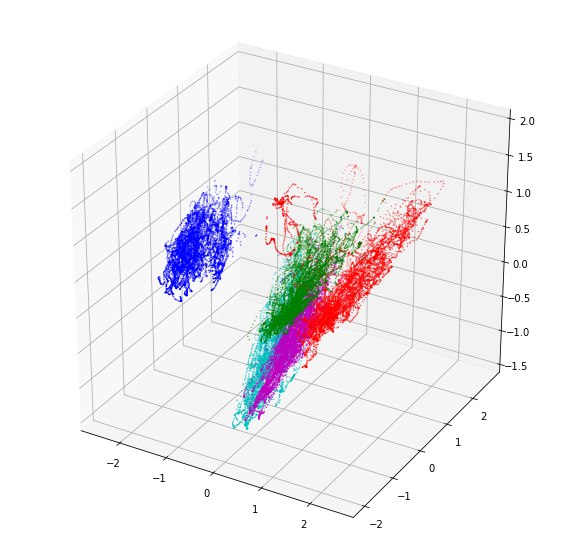

In [5]:

pca = PCA(n_components=3)
enc_basic = basic_enc.predict(data)
pc_basic = pca.fit_transform(enc_basic)

colors = 'bgrcmykw'

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for cat in range(len(datasets)):
    catp = pc_basic[labels==cat]
    ax.scatter(catp[:,0], catp[:,1], catp[:,2], s=0.2, c=colors[cat])

In [ ]:
%matplotlib notebook
visualize.plot_hand(data[0], figsize=(9,9))

In [ ]:
%matplotlib notebook
pca = PCA(n_components=3)
enc_tsne = tsne_enc.predict(data)
pc_tsne = pca.fit_transform(enc_tsne)

colors = 'bgrcmykw'

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for cat in range(len(datasets)):
    catp = pc_tsne[labels==cat]
    ax.scatter(catp[:,0], catp[:,1], catp[:,2], s=0.2, c=colors[cat])

In [ ]:
%matplotlib notebook
pca = PCA(n_components=3)
enc_var = var_enc.predict(data)[0]
pc_var = pca.fit_transform(enc_var)

colors = 'bgrcmykw'

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for cat in range(len(datasets)):
    catp = pc_var[labels==cat]
    ax.scatter(catp[:,0], catp[:,1], catp[:,2], s=0.2, c=colors[cat])

In [ ]:
rec_basic = basic_dec.predict(enc_basic)
rec_tsne = tsne_dec.predict(enc_tsne)
rec_var = var_dec.predict(enc_var)
visualize.plot_reconstruction(data[0], rec_basic[0], figsize=(10,10))
visualize.plot_reconstruction(data[0], rec_tsne[0], figsize=(10,10))
visualize.plot_reconstruction(data[0], rec_var[0], figsize=(10,10))

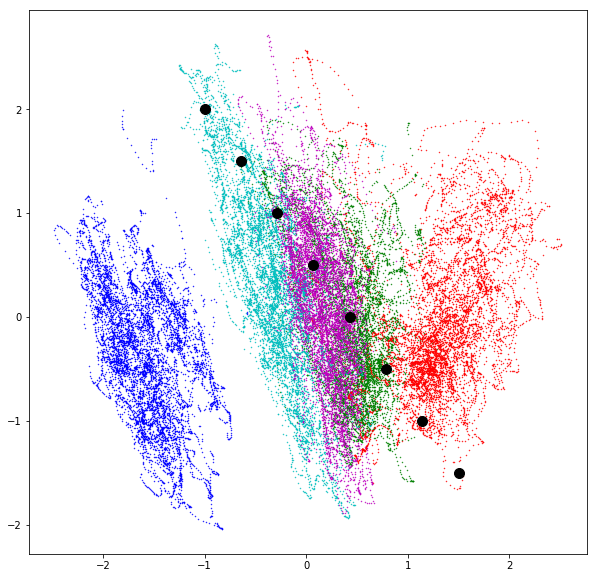

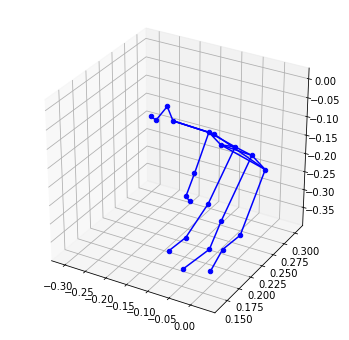

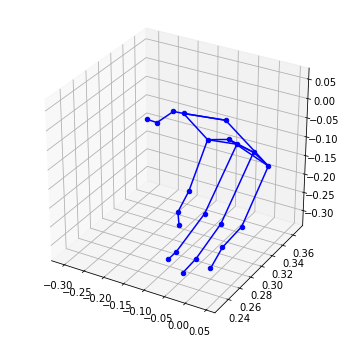

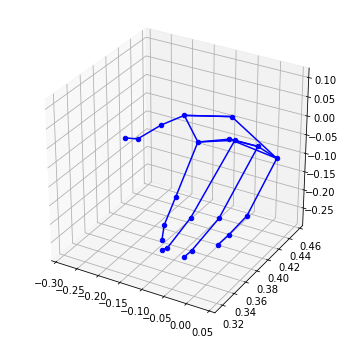

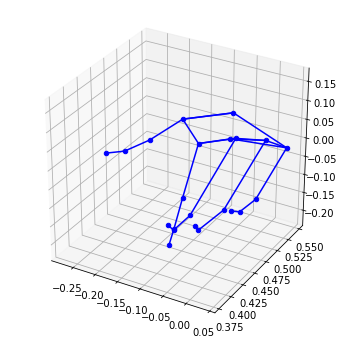

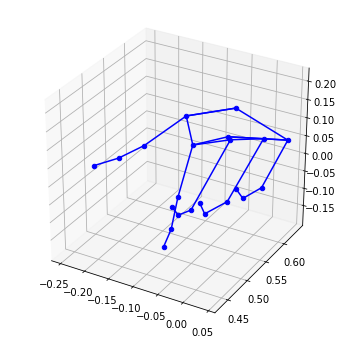

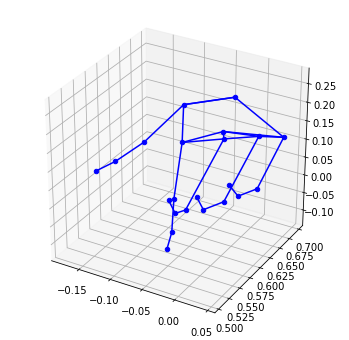

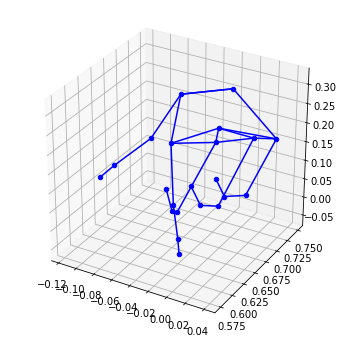

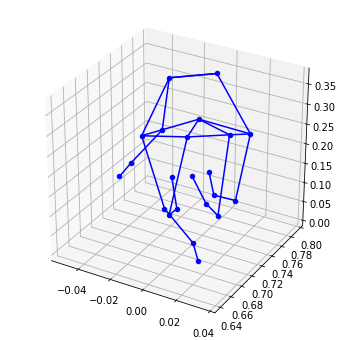

In [6]:
pca = PCA(n_components=2)
pc2_basic = pca.fit_transform(enc_basic)

colors = 'bgrcmykw'

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for cat in range(len(datasets)):
    catp = pc_basic[labels==cat]
    ax.scatter(catp[:,0], catp[:,1], s=0.2, c=colors[cat])
    
points = np.stack((np.linspace(1.5, -1, 8), np.linspace(-1.5, 2, 8)), axis=1)
points_invt = basic_dec.predict(pca.inverse_transform(points))
ax.scatter(points[:,0], points[:,1], s=100, c='k')

for p_inv in points_invt:
    visualize.plot_hand(p_inv)
    pass